In [1]:
import os
import sys
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
path1 = r'C:\mNG_Exp2'
path2 = r'C:\mNG_Exp1'
path3 =  r'C:/Intensity_analysis/'


list0916=[]
list0821=[]
for file in os.listdir(path1):
    current = os.path.splitext(file)[0]
    list0916.append(current)
for file in os.listdir(path2):
    current = os.path.splitext(file)[0]
    list0821.append(current)

In [4]:
#Get the median of raw data
def get_median(df,path1, filename,i):
    FITC_R = filename + "_Results.csv"
    Excel = pd.read_csv(path1 + FITC_R)
    Experiments=['_exp1', '_exp2']
    name=filename+Experiments[i]
    Intensity = Excel.Median
    df[name]=Intensity
    return df

In [5]:
df=pd.DataFrame()
for i in range(12):
    get_median(df,path3, list0821[i],0)
    get_median(df,path3, list0916[i],1)
df.median()

5XmNG2_1_exp1           437.0
5XmNG2_1_FITC_exp2      479.0
5XmNG2_2_exp1           410.0
5XmNG2_2_FITC_exp2      386.0
5XmNG3A_1_exp1         1002.0
5XmNG3A_1_FITC_exp2     948.0
5XmNG3A_2_exp1         1699.0
5XmNG3A_2_FITC_exp2    1796.0
5XmNG3K_1_exp1         1429.0
5XmNG3K_1_FITC_exp2     877.0
5XmNG3K_2_exp1         1157.5
5XmNG3K_2_FITC_exp2     990.0
mNG2_1_exp1             585.0
mNG2_1_FITC_exp2        452.5
mNG2_2_exp1             537.0
mNG2_2_FITC_exp2        571.0
mNG3A_1_exp1            541.5
mNG3A_1_FITC_exp2       711.0
mNG3A_2_exp1            517.5
mNG3A_2_FITC_exp2       581.0
mNG3K_1_exp1            585.0
mNG3K_1_FITC_exp2       809.0
mNG3K_2_exp1            731.0
mNG3K_2_FITC_exp2       735.0
dtype: float64

Text(0, 0.5, 'Fluorescence Intensity')

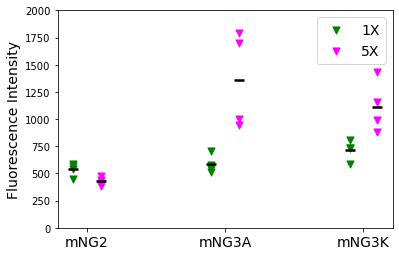

In [6]:
# Intensity median of four replicas
#Mark scatter points
mNG2=[585,452.5,537,571]
position1=[0.9,0.9,0.9,0.9]

mNG2x5=[437,479,410,386]
position2=[1.1,1.1,1.1,1.1]

mNG3A =[541.5,711,517.5,581]
position3=[1.9,1.9,1.9,1.9]

mNG3Ax5=[1002,948,1699,1796]
position4=[2.1,2.1,2.1,2.1]

mNG3K=[585,809,731,735]
position5=[2.9,2.9,2.9,2.9]

mNG3Kx5=[1429,877,1157.5,990]
position6=[3.1,3.1,3.1,3.1]

fig, ax = plt.subplots()
plt.ylim(0,2000)
rects1 = ax.scatter(position1, mNG2, color="green",s=50,marker="v",label="1X")
rects2 = ax.scatter(position2, mNG2x5, color="magenta",s=50,marker="v",label="5X")
rects3 = ax.scatter(position3, mNG3A, color="green",s=50,marker="v")
rects4 = ax.scatter(position4, mNG3Ax5, color="magenta",s=50,marker="v")
rects5 = ax.scatter(position5, mNG3K, color="green",s=50,marker="v")
rects6 = ax.scatter(position6, mNG3Kx5, color="magenta",s=50,marker="v")
plt.legend(prop={'size': 14})

#Mark mean of each group
mNG11X1_means = [536.375,587.75, 715]
mNG11X5_means = [428, 1361.25, 1113.375]
mNG11X1_position = [0.9,1.9,2.9]
mNG11X5_position = [1.1,2.1,3.1]
rects7 = ax.scatter(mNG11X1_position, mNG11X1_means,s=100,linewidth=2.5, color="black", marker="_")
rects8 = ax.scatter(mNG11X5_position,mNG11X5_means,s=100, linewidth=2.5,color="black", marker="_")


#Set x_axis label
ind = np.arange(1,4)
ax.set_xticks(ind)
ax.set_xticklabels(('mNG2', 'mNG3A', 'mNG3K'), size=14)
ax.set_ylabel('Fluorescence Intensity',fontsize=14)

In [73]:
#Statitical test
P_mNG2=stats.ttest_ind(mNG2, mNG2x5, equal_var=True, nan_policy='propagate')[1]
P_mNG3A=stats.ttest_ind(mNG3A, mNG3Ax5, equal_var=True, nan_policy='propagate')[1]
P_mNG3K=stats.ttest_ind(mNG3K, mNG3Kx5, equal_var=True, nan_policy='propagate')[1]

print(P_mNG2,P_mNG3A, P_mNG3K )

0.023147977606681833 0.014699422895049627 0.021302403644844294
